In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
df = pd.read_excel("Zeiterfassung.xlsx", index_col=0, header=1)

In [3]:
# Assuming df is your DataFrame
# Convert the index to string
df.index = df.index.astype(str)

# Extract the time part and assign it back to the index
df.index = df.index.str.split().str[1]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 00:00:00 to 23:30:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MO      48 non-null     object
 1   DI      48 non-null     object
 2   MI      48 non-null     object
 3   DO      48 non-null     object
 4   FR      48 non-null     object
 5   SA      48 non-null     object
 6   SO      48 non-null     object
dtypes: object(7)
memory usage: 3.0+ KB


In [5]:
df.head()

,MO,DI,MI,DO,FR,SA,SO
00:00:00,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen
00:30:00,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen
01:00:00,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen
01:30:00,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen
02:00:00,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen,Schlafen


In [6]:
# Transforming the data for the bar plot
# Melting the dataframe to a long format
melted_df = df.melt(var_name='Day', value_name='Activity')

# Counting the occurrences of each activity
activity_counts = melted_df['Activity'].value_counts().reset_index()
activity_counts.columns = ['Activity', 'Total Count']

# Converting the total counts to hours (each count is 30 minutes)
activity_counts['Total Hours'] = activity_counts['Total Count'] / 2


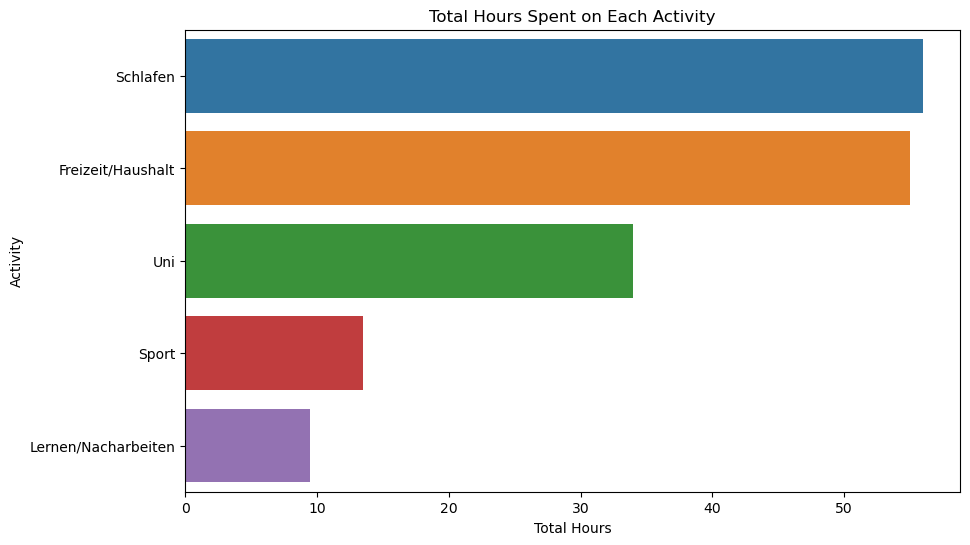

In [7]:
# Creating the bar plot
#Aspect Ratio
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Hours', y='Activity', data=activity_counts)

plt.title('Total Hours Spent on Each Activity')
plt.xlabel('Total Hours')
plt.ylabel('Activity')

# ajust the ending to fit your needed format (".png", ".jpg", ".svg")
plt.savefig('barPlot.svg')

plt.show()



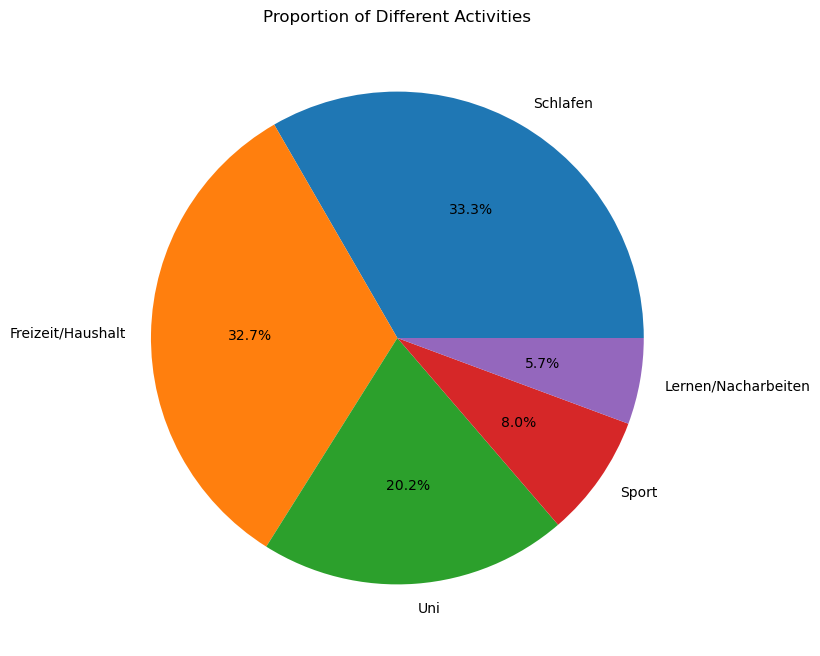

In [13]:
# Summarizing the data for pie chart
activity_summary = df.melt().value.value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
activity_summary.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Different Activities')
plt.ylabel('')  # Hiding the y-label

# ajust the ending to fit your needed format (".png", ".jpg", ".svg")
plt.savefig('piePlot.svg')

plt.show()

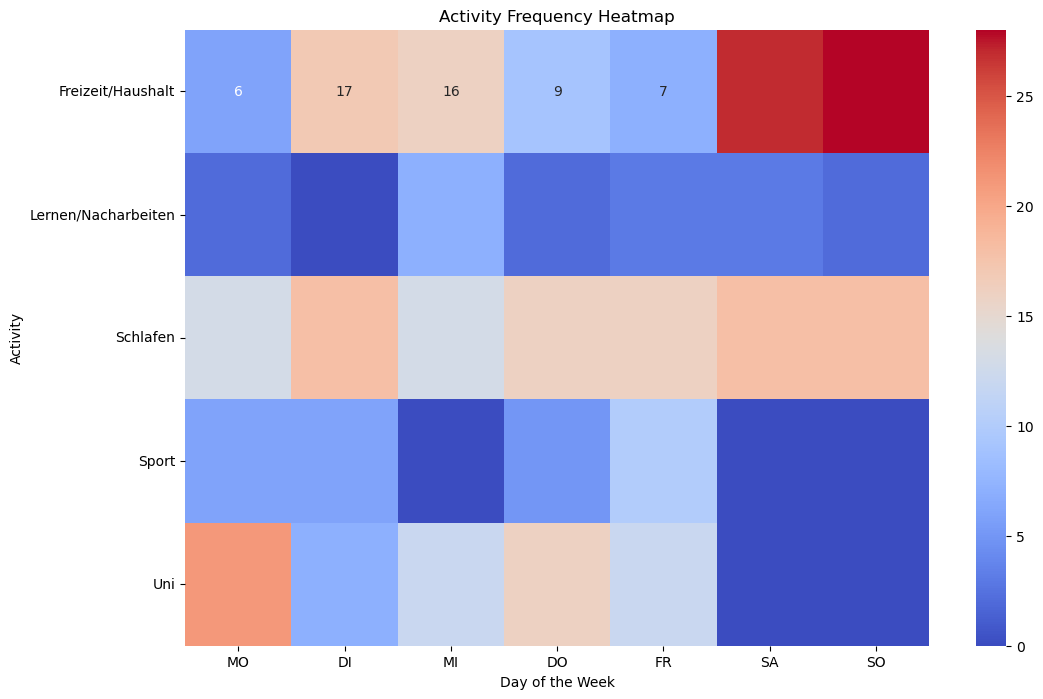

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Creating a new DataFrame for heatmap
activity_counts = df.apply(pd.Series.value_counts).fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(activity_counts, annot=True, cmap='coolwarm')
plt.title('Activity Frequency Heatmap')
plt.xlabel('Day of the Week')
plt.ylabel('Activity')

# ajust the ending to fit your needed format (".png", ".jpg", ".svg")
plt.savefig('headmap.svg')

plt.show()
